In [ ]:
# prompt: how can I see the list of files inside data_path

import os
import kagglehub

data_path = kagglehub.dataset_download('sahilchambyal/solana-price-usd')

# List the files inside the downloaded data directory
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/1/SOLUSD_1s_05NOV2024_to15NOV2024.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/1/SOLUSD_1s_01NOV2024_to15NOV2024.csv
/root/.cache/kagglehub/datasets/sahilchambyal/solana-price-usd/versions/1/SOLUSD_1min_20AUG2020_to15NOV2024.csv


In [ ]:
import pandas as pd
df = pd.read_csv(data_path + '/SOLUSD_1min_20AUG2020_to15NOV2024.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229000 entries, 0 to 2228999
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   OpenTime             int64  
 1   Open                 float64
 2   High                 float64
 3   Low                  float64
 4   Close                float64
 5   Volume               float64
 6   CloseTime            int64  
 7   QuoteAssetVolume     float64
 8   NumberOfTrades       int64  
 9   TakerBuyBaseVolume   float64
 10  TakerBuyQuoteVolume  float64
 11  Ignore               int64  
dtypes: float64(8), int64(4)
memory usage: 204.1 MB


# Line Chart for Price Trends

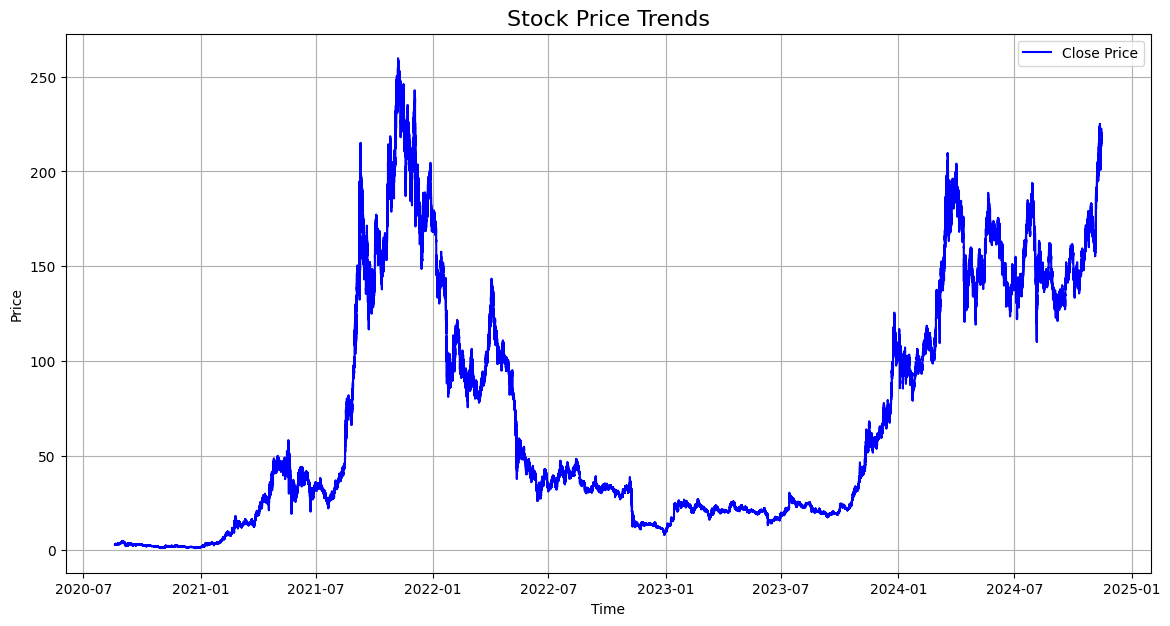

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert OpenTime to datetime
df['OpenTime'] = pd.to_datetime(df['OpenTime'], unit='ms')

# Line chart for Close prices
plt.figure(figsize=(14, 7))
plt.plot(df['OpenTime'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Price Trends', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


# Candlestick Chart

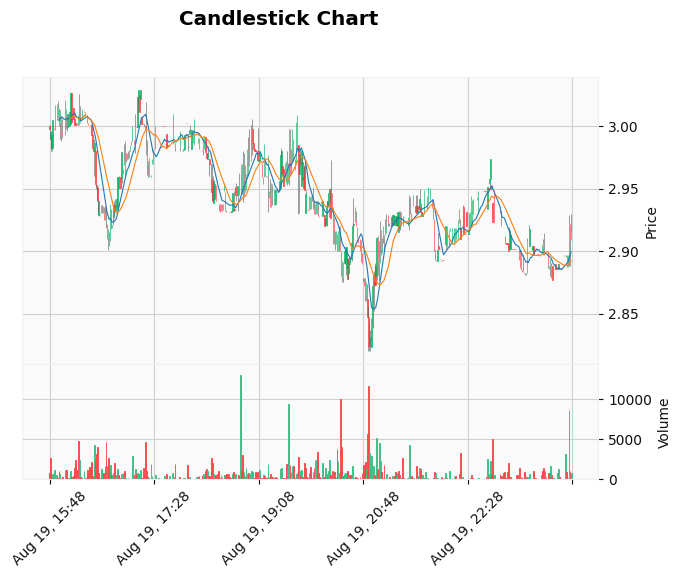

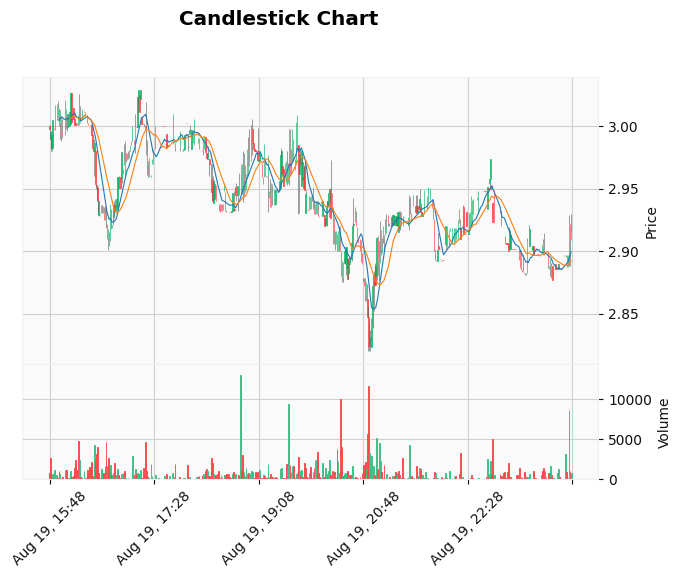

In [ ]:
# !pip install mlpfinance
!pip install mplfinance
import mplfinance as mpf

# Select a sample range for candlestick plot
sample_df = df.iloc[:500]
sample_df.set_index(pd.to_datetime(sample_df['OpenTime'], unit='ms'), inplace=True)

# Candlestick chart
mpf.plot(
    sample_df,
    type='candle',
    volume=True,
    title='Candlestick Chart',
    style='yahoo',
    mav=(10, 20)  # Moving averages of 10 and 20 periods
)


# Select a sample range for candlestick plot
sample_df = df.iloc[:500]
sample_df.set_index(pd.to_datetime(sample_df['OpenTime'], unit='ms'), inplace=True)

# Candlestick chart
mpf.plot(
    sample_df,
    type='candle',
    volume=True,
    title='Candlestick Chart',
    style='yahoo',
    mav=(10, 20)  # Moving averages of 10 and 20 periods
)


# Trading Volume Analysis

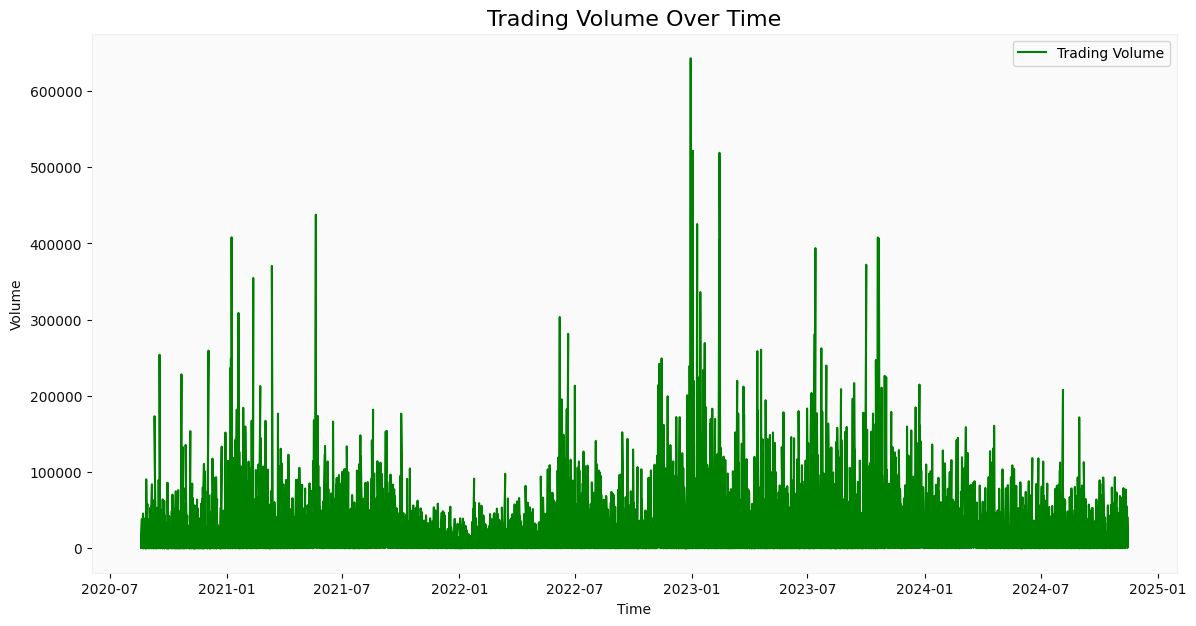

In [ ]:
import seaborn as sns

# Line chart of Volume over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='OpenTime', y='Volume', data=df, label='Trading Volume', color='green')
plt.title('Trading Volume Over Time', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()


# Correlation Heatmap

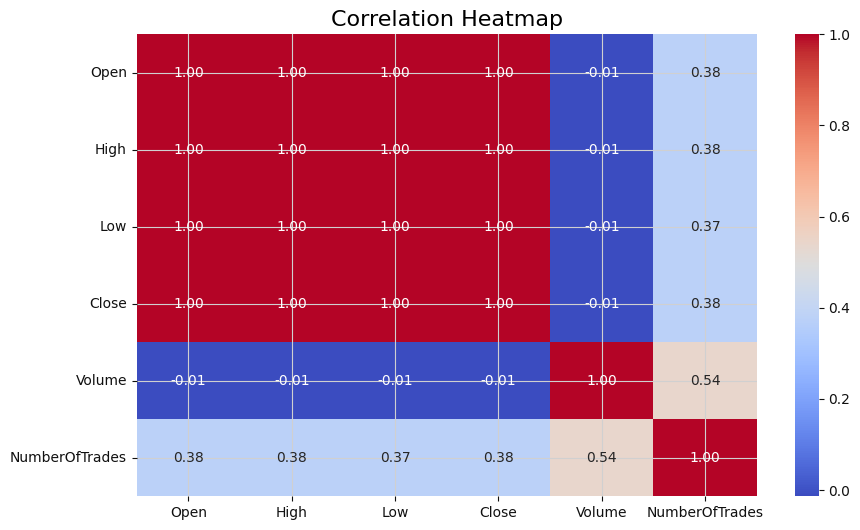

In [ ]:
# Compute correlations
correlation = df[['Open', 'High', 'Low', 'Close', 'Volume', 'NumberOfTrades']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


# Buy/Sell Volume Comparison

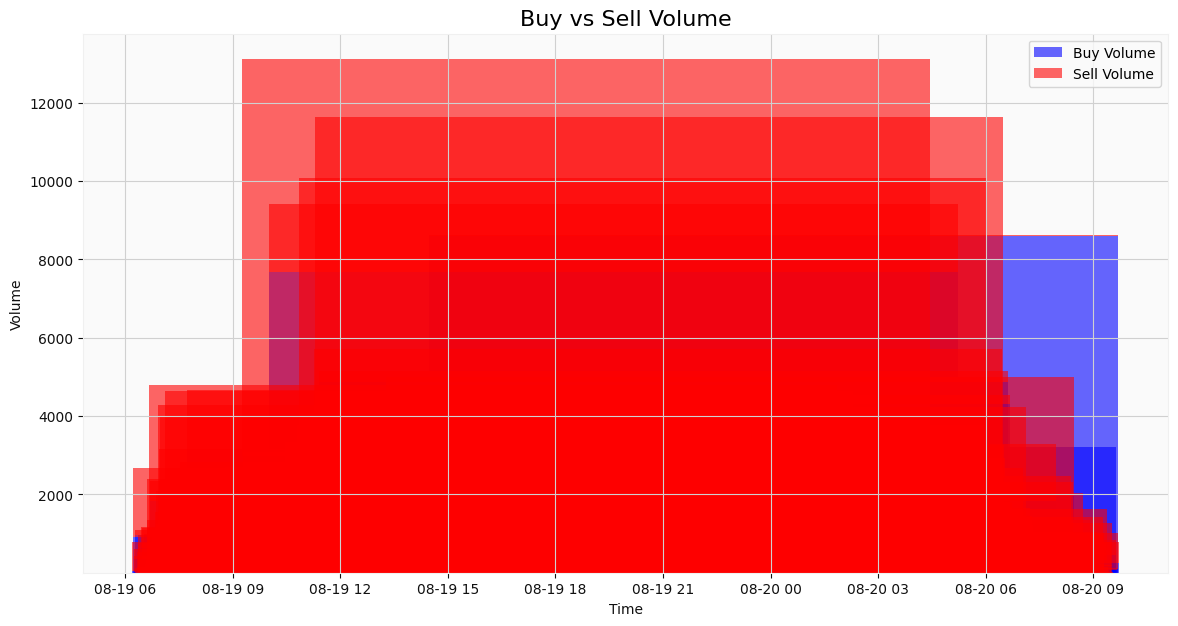

In [ ]:
# Calculate Sell Volume
df['SellVolume'] = df['Volume'] - df['TakerBuyBaseVolume']

# Stacked bar chart
plt.figure(figsize=(14, 7))
plt.bar(df['OpenTime'][:500], df['TakerBuyBaseVolume'][:500], label='Buy Volume', color='blue', alpha=0.6)
plt.bar(df['OpenTime'][:500], df['SellVolume'][:500], bottom=df['TakerBuyBaseVolume'][:500], label='Sell Volume', color='red', alpha=0.6)
plt.title('Buy vs Sell Volume', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()


# Hourly Price Patterns (Boxplot)

<ipython-input-15-43523120abba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='Close', data=df, palette='coolwarm')


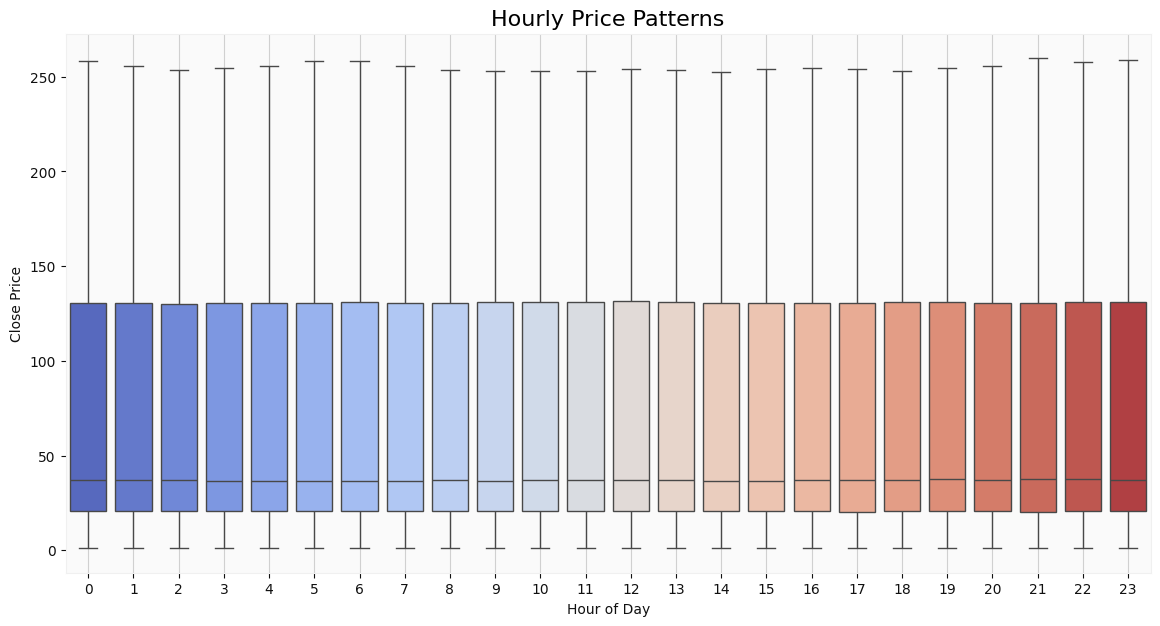

In [ ]:
# Convert OpenTime to datetime and extract hour
df['Hour'] = pd.to_datetime(df['OpenTime']).dt.hour

# Boxplot for Close prices by hour
plt.figure(figsize=(14, 7))
sns.boxplot(x='Hour', y='Close', data=df, palette='coolwarm')
plt.title('Hourly Price Patterns', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Close Price')
plt.grid()
plt.show()


# Volume-Weighted Average Price (VWAP)

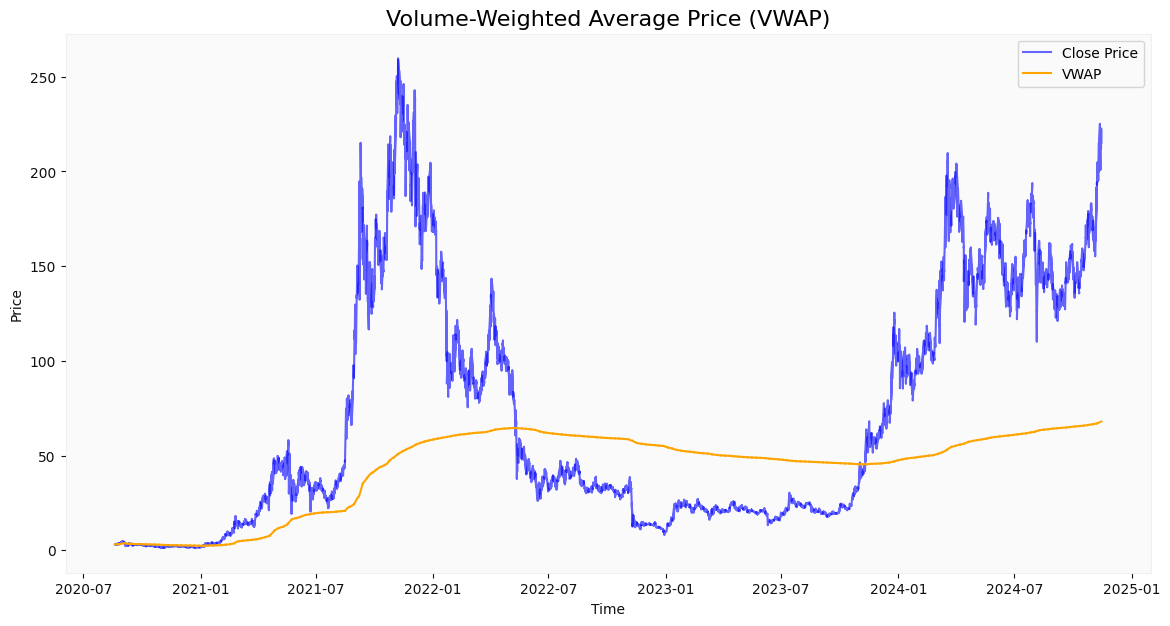

In [ ]:
# Calculate VWAP
df['VWAP'] = (df['Close'] * df['Volume']).cumsum() / df['Volume'].cumsum()

# Plot Close price and VWAP
plt.figure(figsize=(14, 7))
plt.plot(df['OpenTime'], df['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(df['OpenTime'], df['VWAP'], label='VWAP', color='orange')
plt.title('Volume-Weighted Average Price (VWAP)', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


# Price Action Heatmap (Hourly Trends)

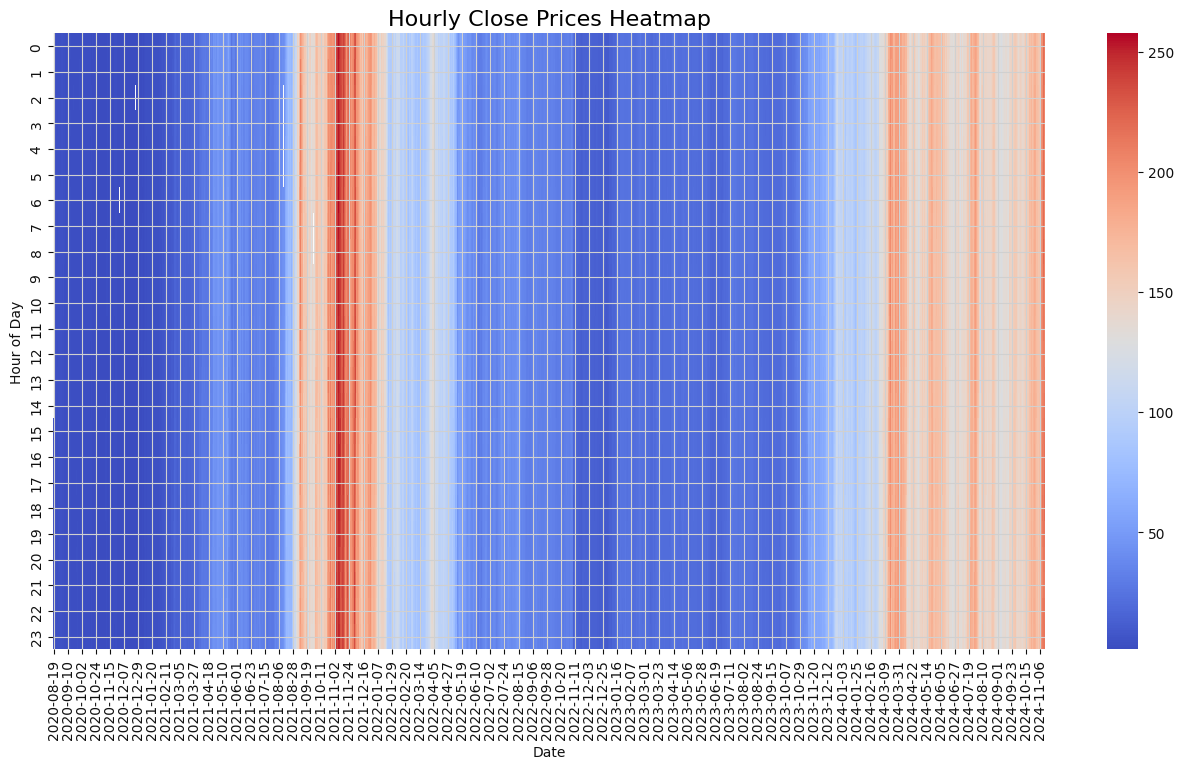

In [ ]:
# Extract date and hour
df['Date'] = pd.to_datetime(df['OpenTime']).dt.date
df['Hour'] = pd.to_datetime(df['OpenTime']).dt.hour

# Pivot table for heatmap
heatmap_data = df.pivot_table(index='Hour', columns='Date', values='Close', aggfunc='mean')

# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True)
plt.title('Hourly Close Prices Heatmap', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.show()


# Intraday Returns Distribution

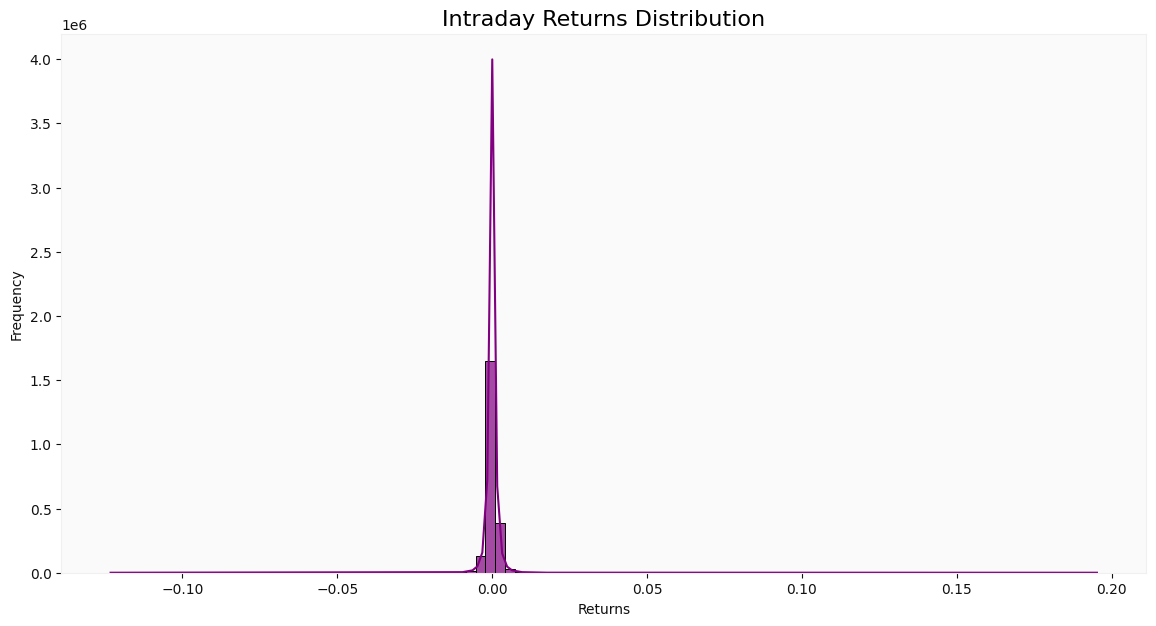

In [ ]:
# Calculate returns
df['Returns'] = df['Close'].pct_change()

# Plot distribution of intraday returns
plt.figure(figsize=(14, 7))
sns.histplot(df['Returns'], bins=100, kde=True, color='purple', alpha=0.7)
plt.title('Intraday Returns Distribution', fontsize=16)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# Time vs. Trades and Volume Bubble Chart

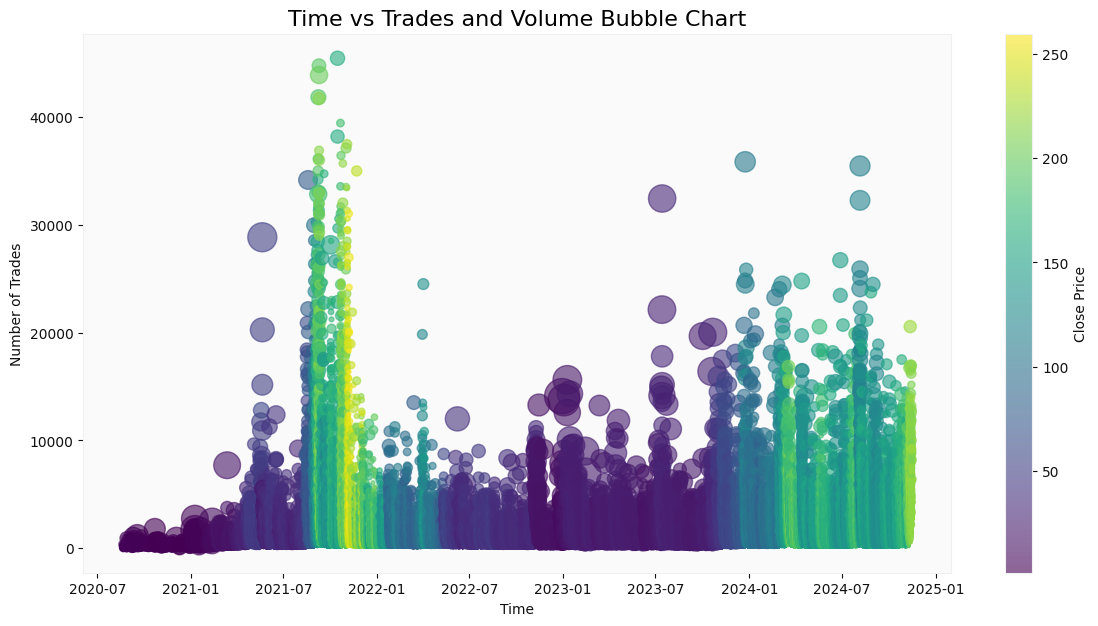

In [ ]:
# Sample a subset for clarity
# sample_df = df.iloc[:1000]

# Bubble chart
plt.figure(figsize=(14, 7))
scatter = plt.scatter(
    df['OpenTime'],
    df['NumberOfTrades'],
    s=df['Volume'] / 1000,  # Bubble size proportional to Volume
    c=df['Close'],
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label='Close Price')
plt.title('Time vs Trades and Volume Bubble Chart', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Number of Trades')
plt.grid()
plt.show()


# Cumulative Returns Over Time

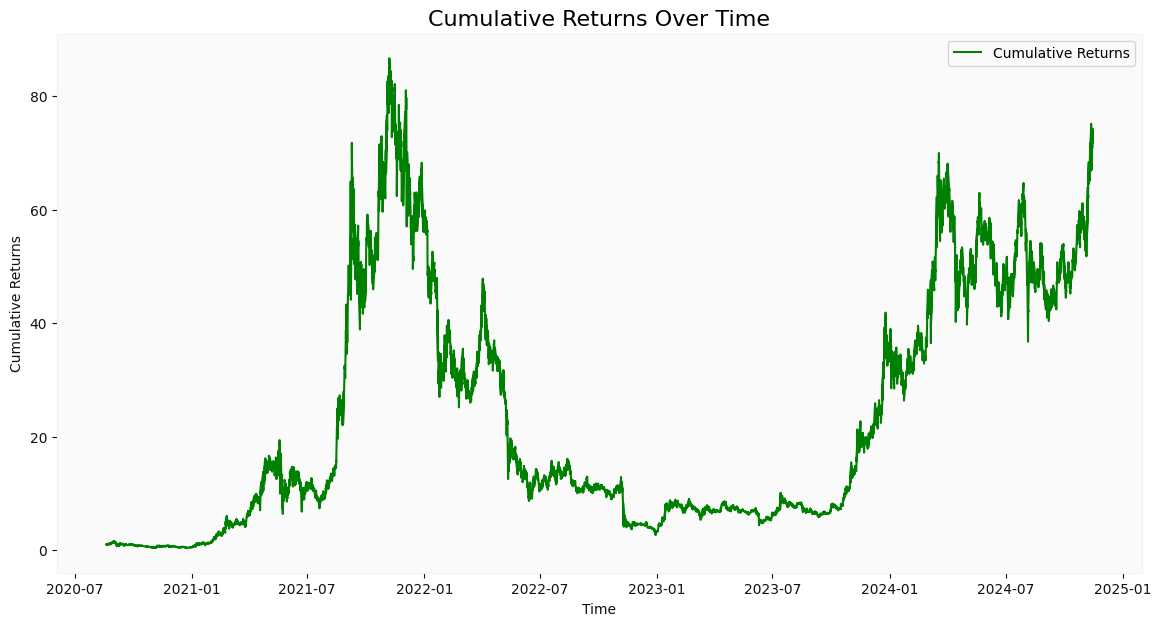

In [ ]:
# Calculate cumulative returns
df['CumulativeReturns'] = (1 + df['Returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df['OpenTime'], df['CumulativeReturns'], label='Cumulative Returns', color='green')
plt.title('Cumulative Returns Over Time', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


# High-Low Price Spread Analysis

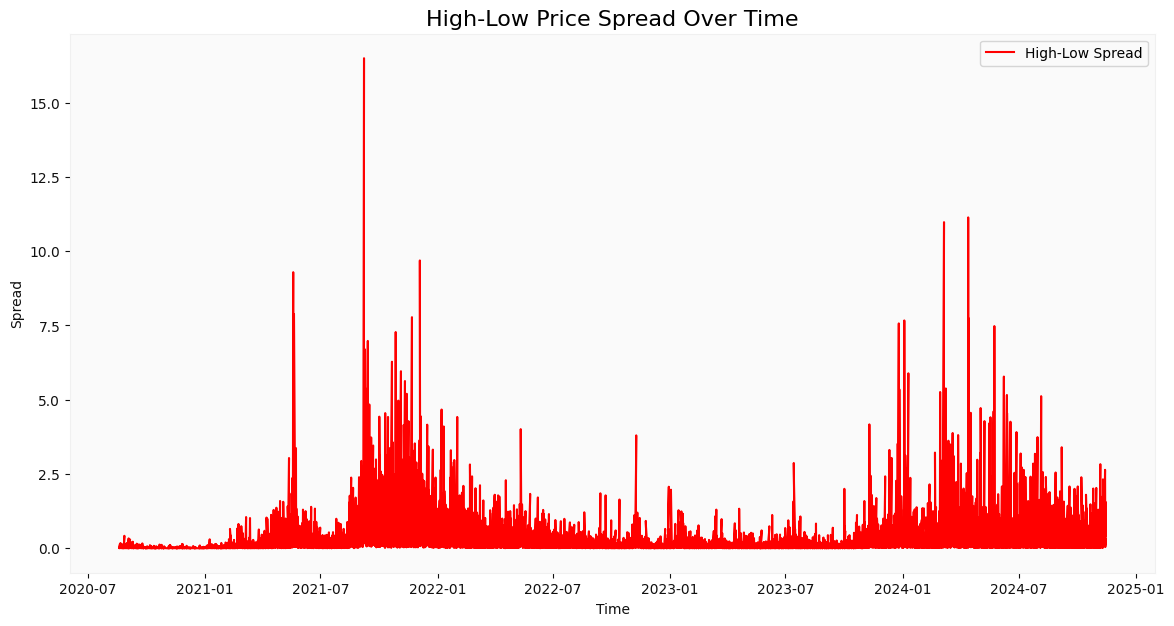

In [ ]:
# Calculate spread
df['Spread'] = df['High'] - df['Low']

# Plot spread
plt.figure(figsize=(14, 7))
plt.plot(df['OpenTime'], df['Spread'], label='High-Low Spread', color='red')
plt.title('High-Low Price Spread Over Time', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Spread')
plt.legend()
plt.grid()
plt.show()


# Trade Intensity Over Time
takes too long to run

In [ ]:
# # Calculate trade intensity
# df['TradeIntensity'] = df['NumberOfTrades'] / df['Volume']

# # Plot trade intensity
# plt.figure(figsize=(14, 7))
# sns.lineplot(x='OpenTime', y='TradeIntensity', data=df, label='Trade Intensity', color='blue')
# plt.title('Trade Intensity Over Time', fontsize=16)
# plt.xlabel('Time')
# plt.ylabel('Trade Intensity')
# plt.grid()
# plt.legend()
# plt.show()


# Pairwise Relationships Using Pairplot

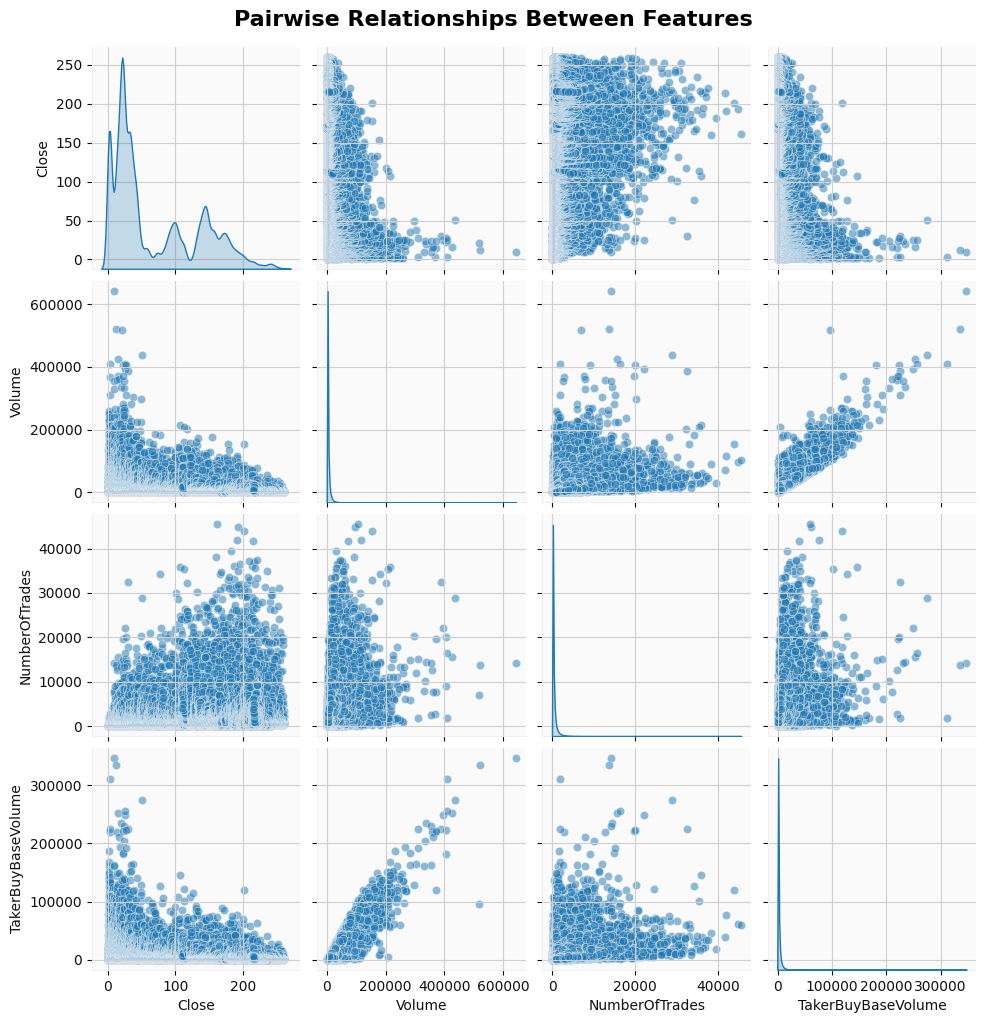

In [ ]:
# Select features for pairplot
selected_features = df[['Close', 'Volume', 'NumberOfTrades', 'TakerBuyBaseVolume']]

# Pairplot
sns.pairplot(selected_features, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships Between Features', y=1.02, fontsize=16)
plt.show()


# Intraday Patterns (Violin Plot)

<ipython-input-25-cdc8d41f55a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Hour', y='Close', data=df, palette='coolwarm', scale='width')
<ipython-input-25-cdc8d41f55a9>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Hour', y='Close', data=df, palette='coolwarm', scale='width')


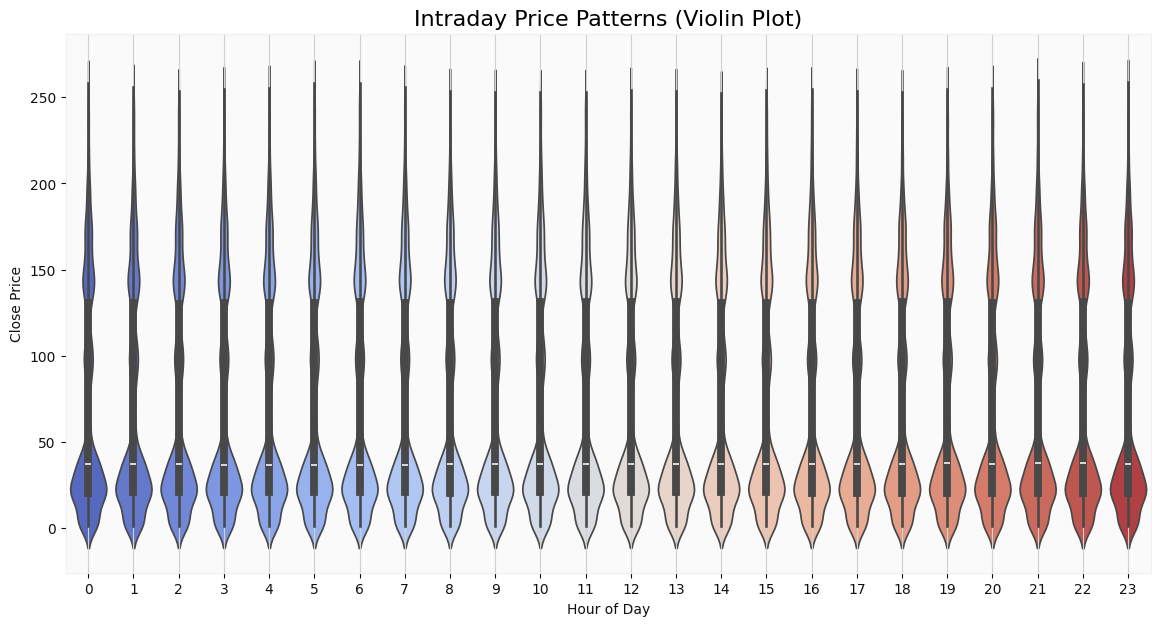

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Hour', y='Close', data=df, palette='coolwarm', scale='width')
plt.title('Intraday Price Patterns (Violin Plot)', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Close Price')
plt.grid()
plt.show()

# Time-Series Decomposition

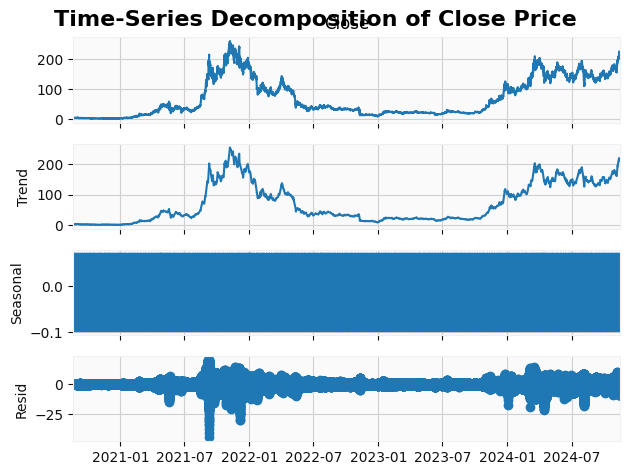

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Close price
df['OpenTime'] = pd.to_datetime(df['OpenTime'])
df.set_index('OpenTime', inplace=True)
result = seasonal_decompose(df['Close'], model='additive', period=1440)  # Assuming 1440 minutes (daily seasonality)

# Plot decomposition
result.plot()
plt.suptitle('Time-Series Decomposition of Close Price', fontsize=16)
plt.show()


# Lag Plot for Autocorrelation Analysis

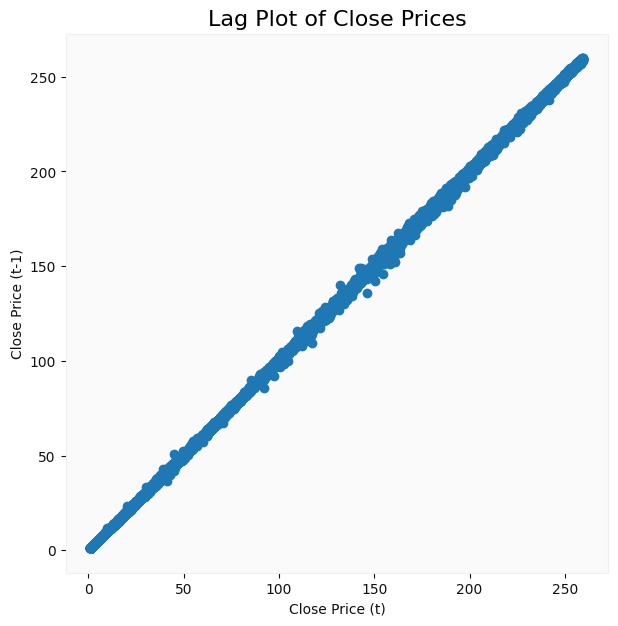

In [ ]:
from pandas.plotting import lag_plot

# Lag plot for Close prices
plt.figure(figsize=(7, 7))
lag_plot(df['Close'], lag=1)
plt.title('Lag Plot of Close Prices', fontsize=16)
plt.xlabel('Close Price (t)')
plt.ylabel('Close Price (t-1)')
plt.grid()
plt.show()


# Autocorrelation and Partial Autocorrelation (ACF and PACF)
doesnt works, takes too long (1hr+)

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # ACF and PACF plots
# fig, ax = plt.subplots(2, 1, figsize=(14, 10))
# plot_acf(df['Close'].dropna(), ax=ax[0], lags=50, title='Autocorrelation of Close Prices')
# plot_pacf(df['Close'].dropna(), ax=ax[1], lags=50, title='Partial Autocorrelation of Close Prices')
# plt.tight_layout()
# plt.show()


# Price Clustering Using K-Means

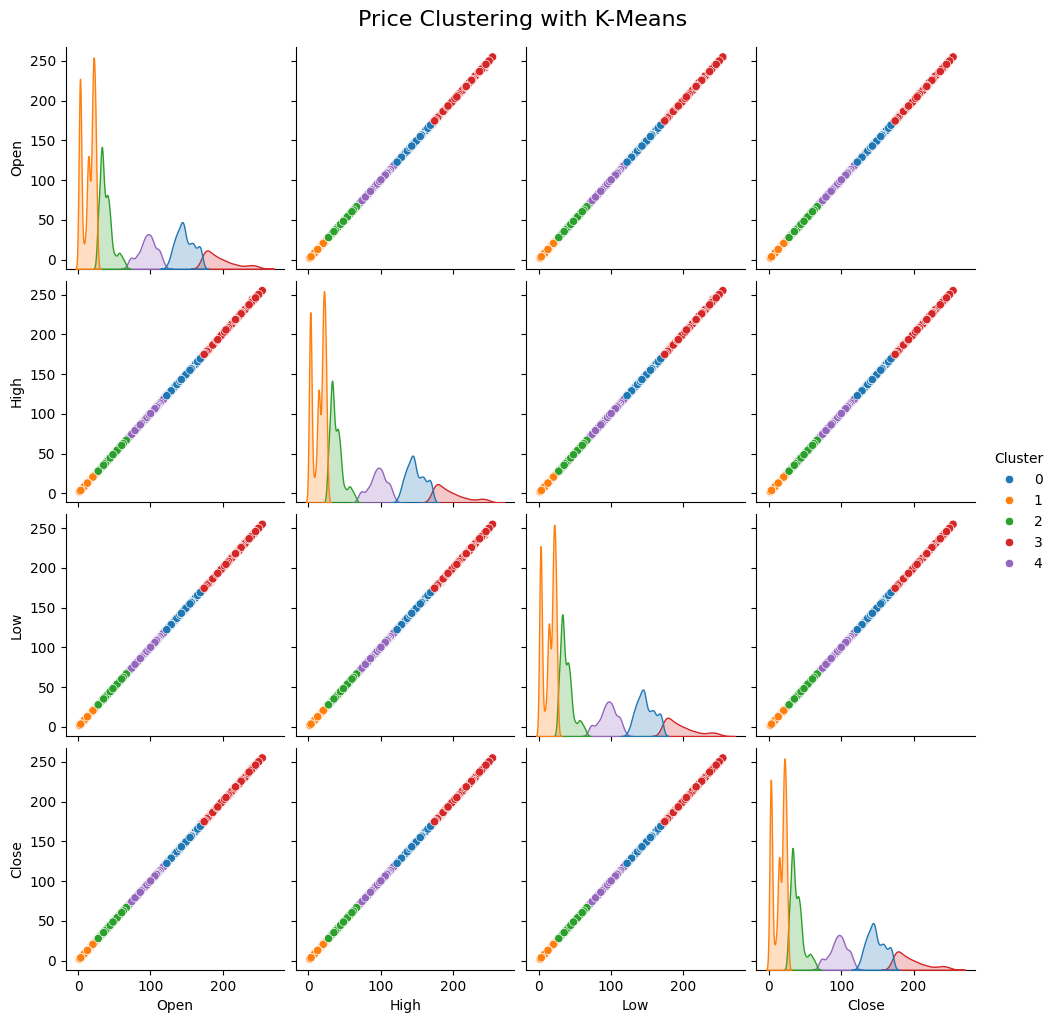

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
clustering_features = df[['Open', 'High', 'Low', 'Close']].sample(10000, random_state=42)  # Downsample for efficiency

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(clustering_features)

# Add cluster labels back to the dataset
clustering_features['Cluster'] = clusters

# Pairplot to visualize clusters
sns.pairplot(clustering_features, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle('Price Clustering with K-Means', y=1.02, fontsize=16)
plt.show()


# Bollinger Bands for Volatility

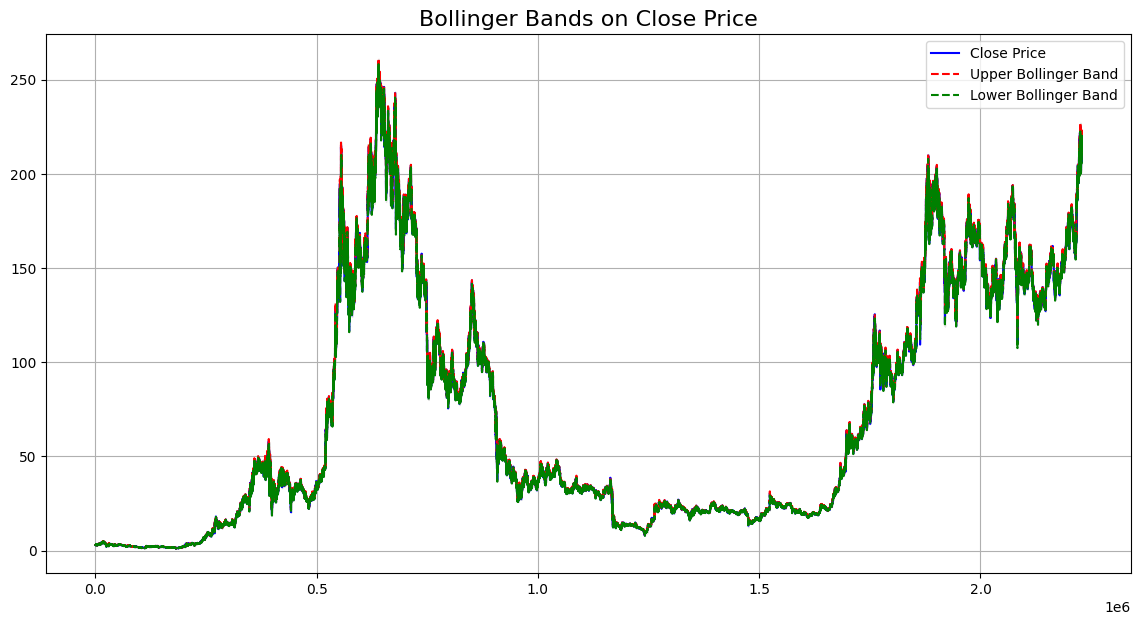

In [ ]:
# Calculate Bollinger Bands
df['MA20'] = df['Close'].rolling(window=20).mean()
df['BB_up'] = df['MA20'] + 2 * df['Close'].rolling(window=20).std()
df['BB_down'] = df['MA20'] - 2 * df['Close'].rolling(window=20).std()

# Plot Close price with Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['BB_up'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(df.index, df['BB_down'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.fill_between(df.index, df['BB_down'], df['BB_up'], color='gray', alpha=0.2)
plt.title('Bollinger Bands on Close Price', fontsize=16)
plt.legend()
plt.grid()
plt.show()


# Dynamic Time Warping (DTW) Similarity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.3 MB/s eta 0:00:00


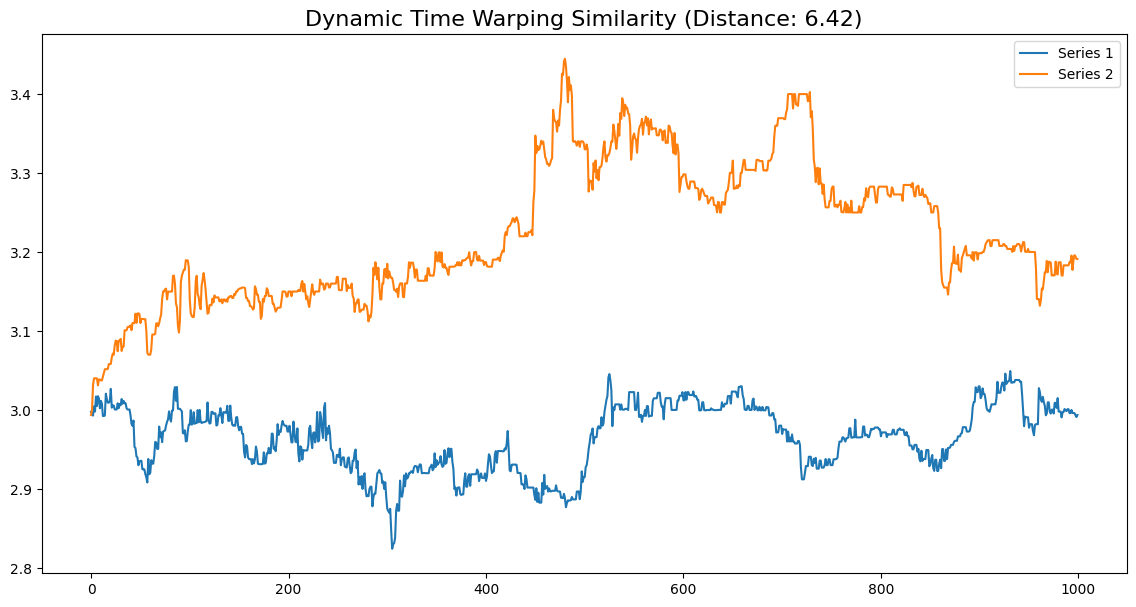

In [ ]:
!pip install dtaidistance
from dtaidistance import dtw

# Sample two time-series segments
series1 = df['Close'].iloc[:1000].values
series2 = df['Close'].iloc[1000:2000].values

# Calculate DTW distance
distance = dtw.distance(series1, series2)

# Plot comparison
plt.figure(figsize=(14, 7))
plt.plot(series1, label='Series 1')
plt.plot(series2, label='Series 2')
plt.title(f'Dynamic Time Warping Similarity (Distance: {distance:.2f})', fontsize=16)
plt.legend()
plt.show()


# Trading Session Density Plot

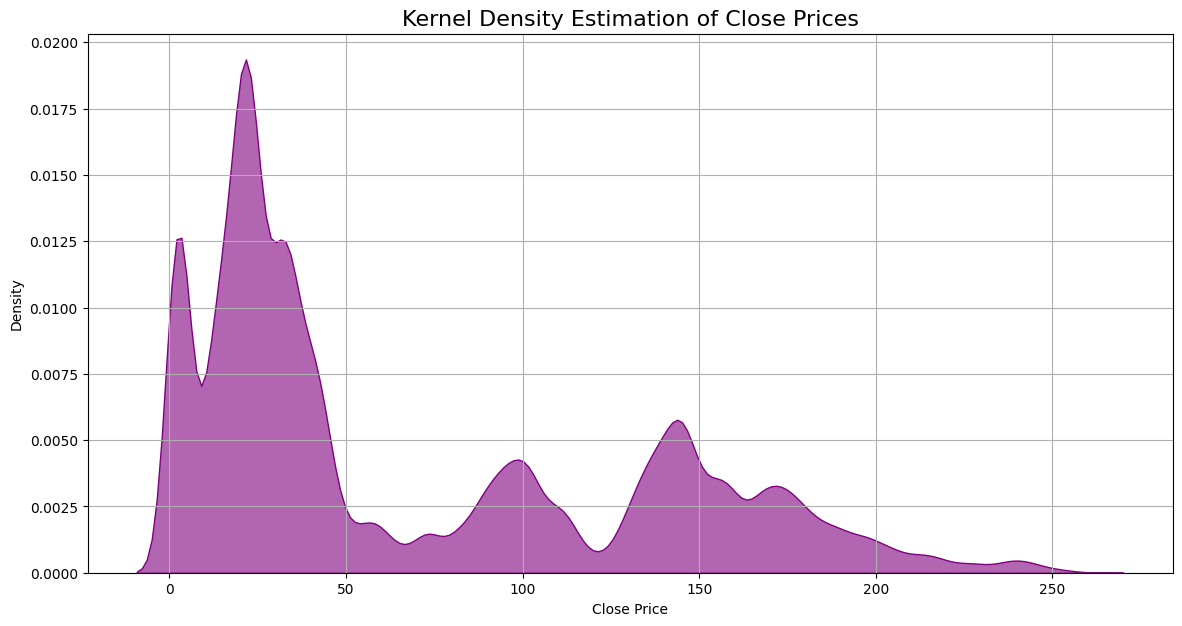

In [ ]:
# KDE plot for Close prices
plt.figure(figsize=(14, 7))
sns.kdeplot(df['Close'], fill=True, color='purple', alpha=0.6)
plt.title('Kernel Density Estimation of Close Prices', fontsize=16)
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.grid()
plt.show()


# High-Frequency Time Series Forecasting (ARIMA)

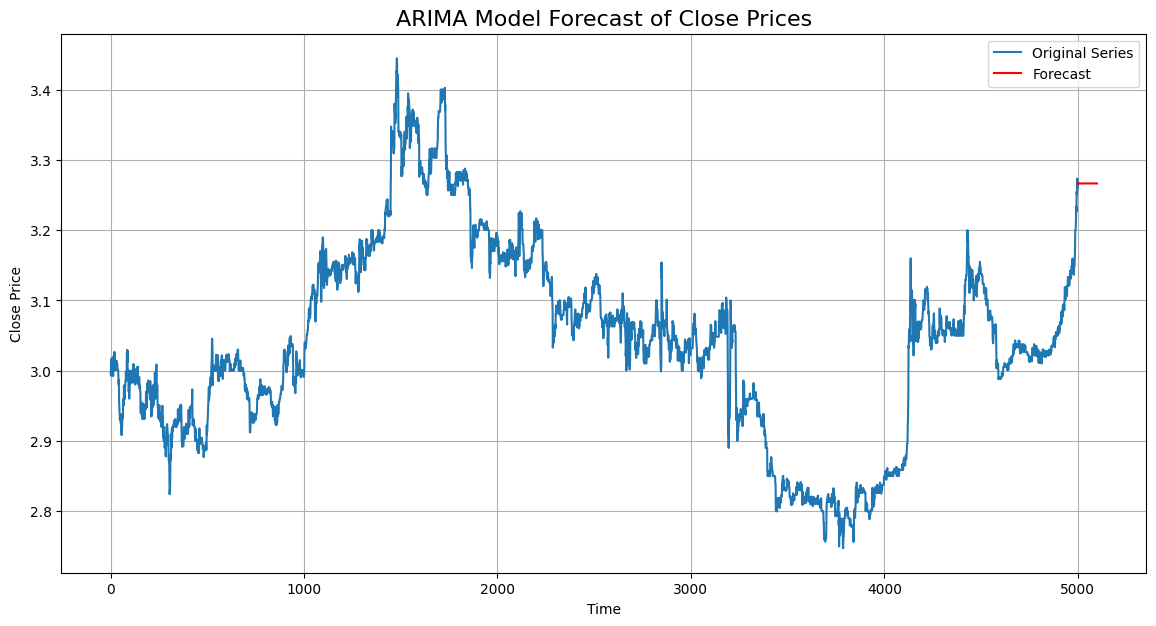

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['Close'].iloc[:5000], order=(5, 1, 0))  # ARIMA(p, d, q)
fitted_model = model.fit()

# Forecast future values
forecast = fitted_model.forecast(steps=100)

# Plot original data and forecast
plt.figure(figsize=(14, 7))
plt.plot(df['Close'].iloc[:5000], label='Original Series')
plt.plot(range(5000, 5100), forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast of Close Prices', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()


# Order Book Analysis Using Heatmap

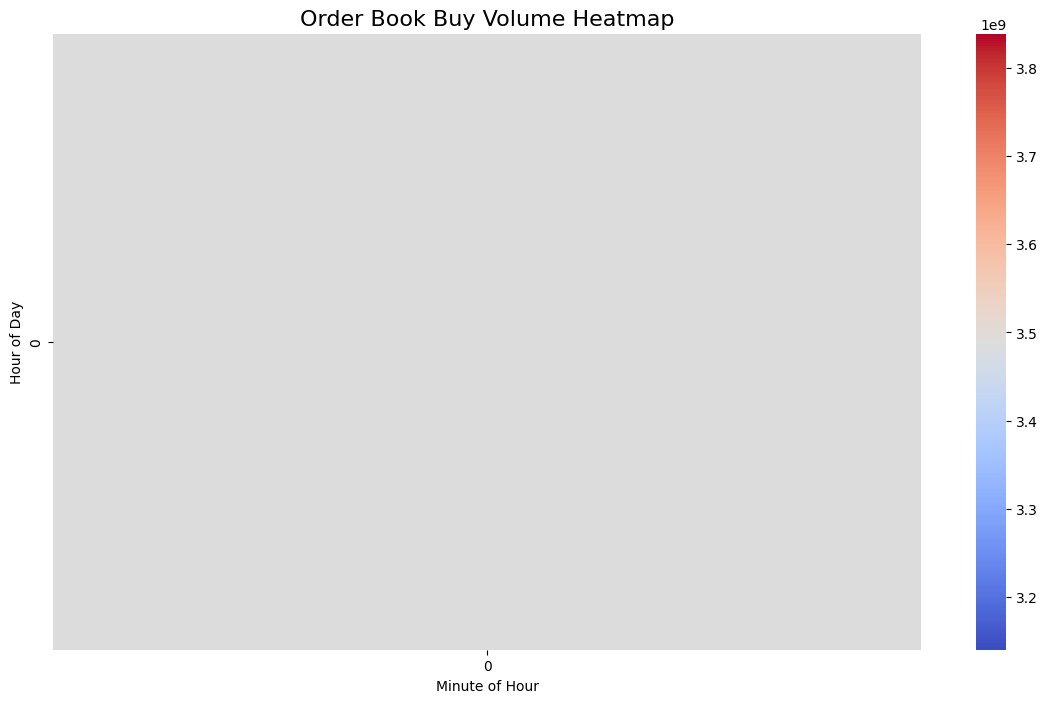

In [ ]:
# Create pivot for heatmap
order_book_data = df.pivot_table(
    index=pd.to_datetime(df.index).hour,
    columns=pd.to_datetime(df.index).minute,
    values='TakerBuyBaseVolume',
    aggfunc='sum'
)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(order_book_data, cmap='coolwarm', cbar=True)
plt.title('Order Book Buy Volume Heatmap', fontsize=16)
plt.xlabel('Minute of Hour')
plt.ylabel('Hour of Day')
plt.show()


# Custom Momentum Indicator

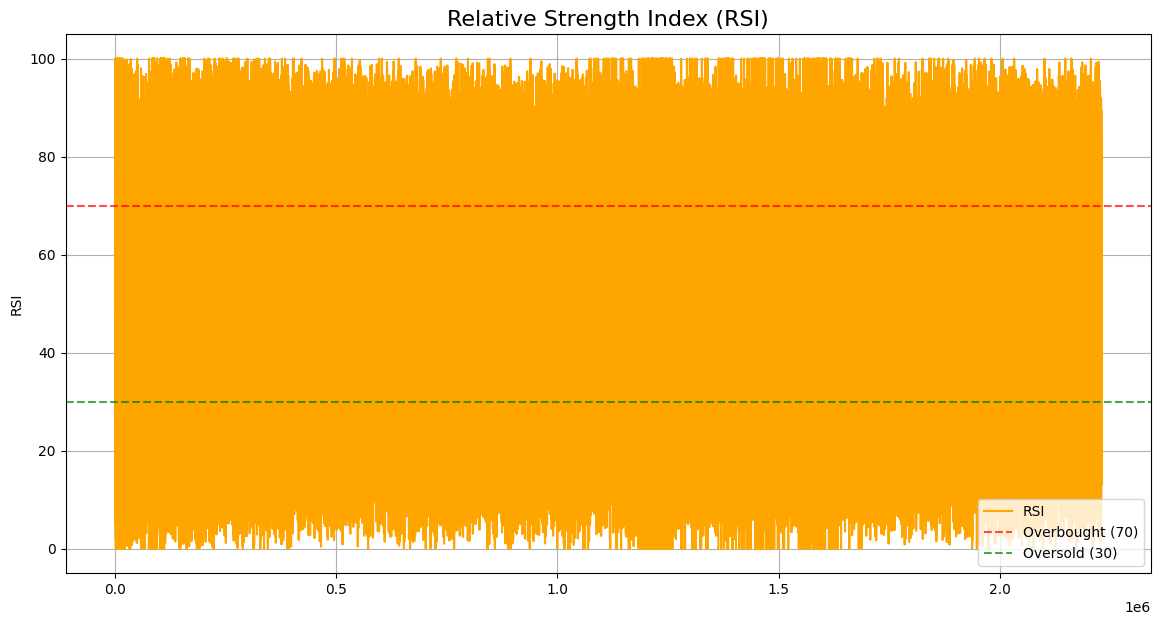

In [ ]:
# Calculate RSI
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['RSI'], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red', alpha=0.7, label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', alpha=0.7, label='Oversold (30)')
plt.title('Relative Strength Index (RSI)', fontsize=16)
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()
